# TIPS Complete

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

tips = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


A data frame with 244 observations on the following 8 variables.


**total_bill:** a numeric vector, the bill amount (dollars)

**tip:**a numeric vector, the tip amount (dollars)

**sex:** factor with levels Female Male, gender of the payer of the bill

**smoker:** factor with levels No Yes, whether the party included smokers

**day:** factor with levels Friday Saturday Sunday Thursday, day of the week

**time:** factor with levels Day Night, rough time of day

**size:** numeric vector, number of people in party

In [2]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# sns.set()
# tips = sns.load_dataset("tips")
# tips.head()

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

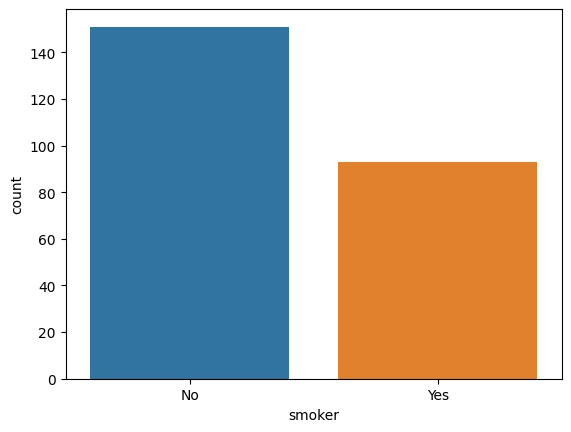

In [7]:
sns.countplot(x='smoker',data=tips,hue='smoker');

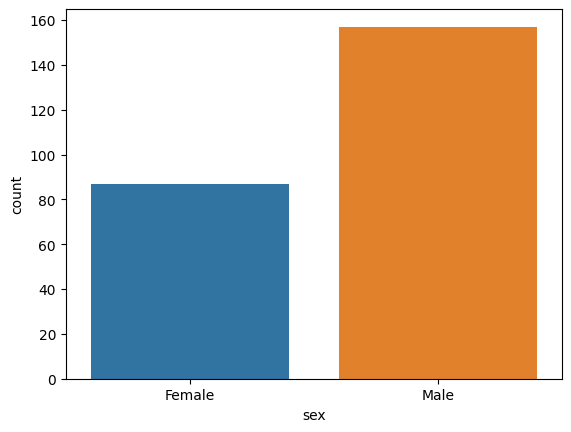

In [8]:
sns.countplot(x='sex',data=tips,hue='sex');

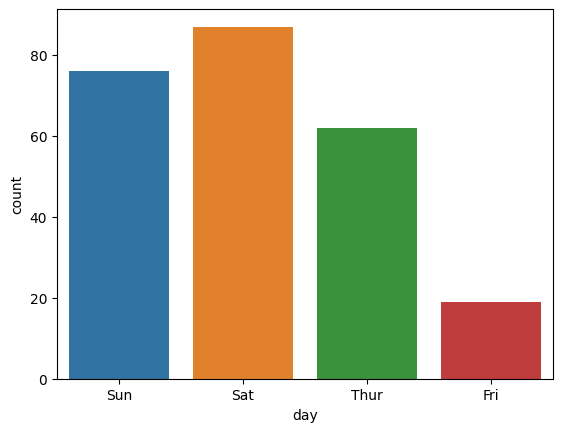

In [9]:
sns.countplot(x='day',data=tips,hue='day');

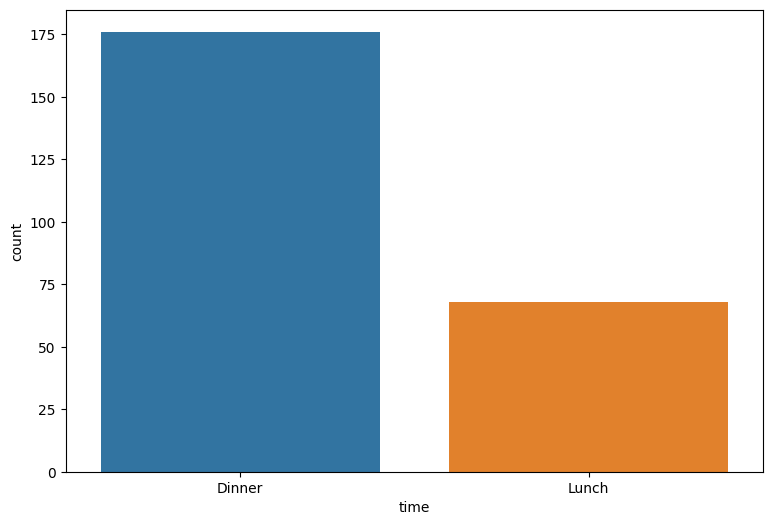

In [10]:
plt.figure(figsize=(9,6))
sns.countplot(x='time',data=tips,hue='time');

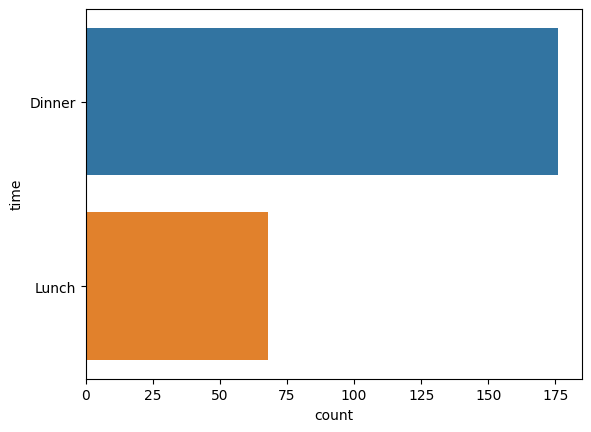

In [11]:
sns.countplot(y='time',data=tips,hue='time');

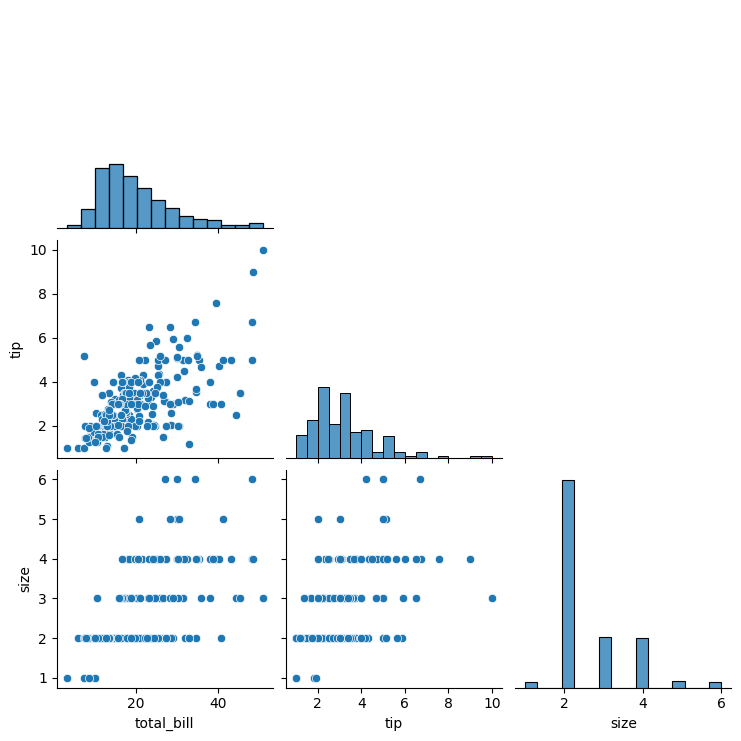

In [12]:
sns.pairplot(tips,corner=True)

In [13]:
## Categorical = 'sex', 'smoker' , 'day', 'time' , 'size'

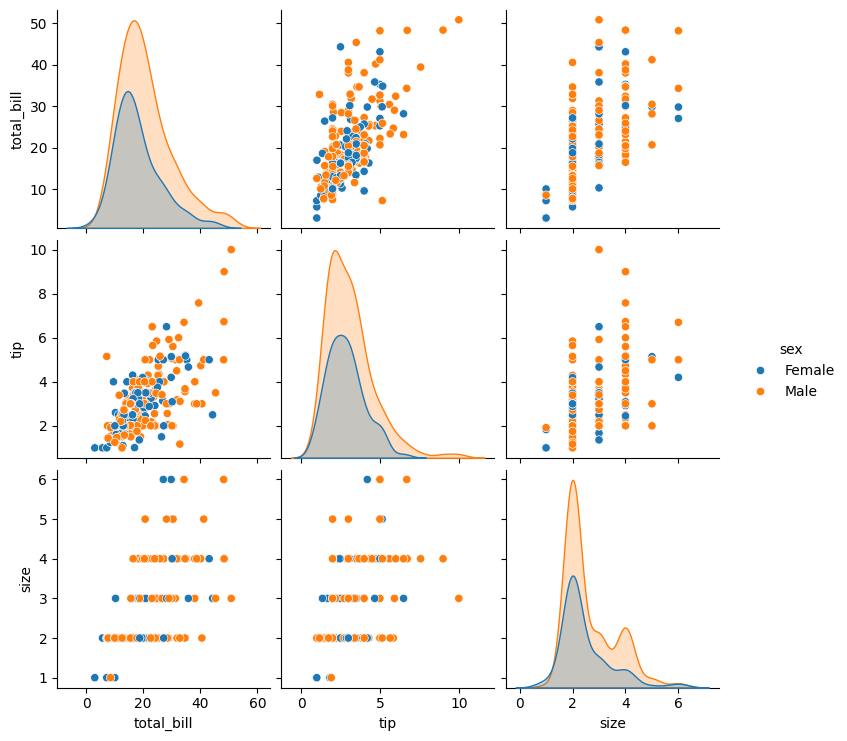

In [14]:
sns.pairplot(tips,hue='sex');

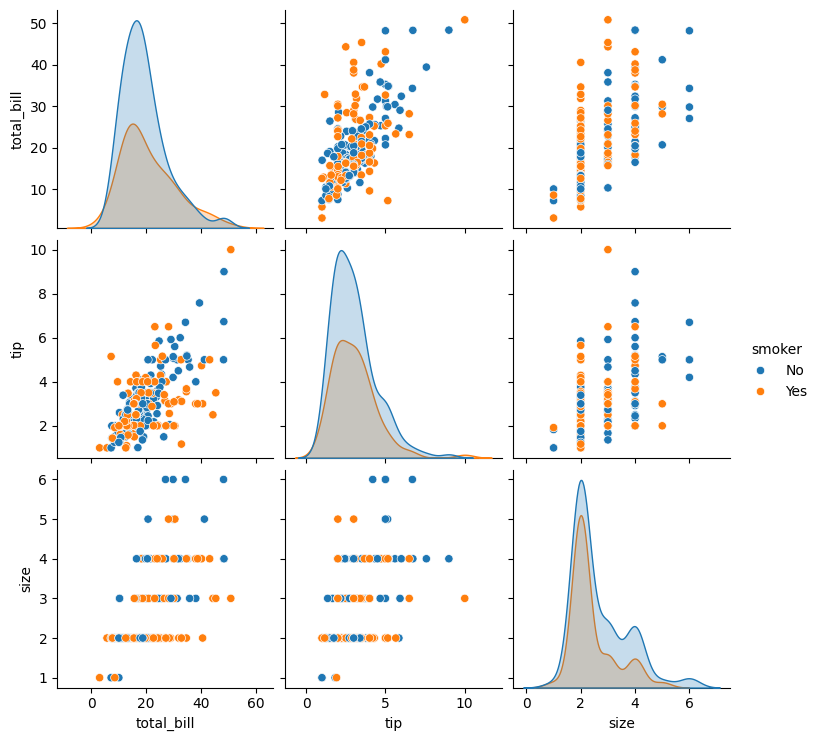

In [15]:
sns.pairplot(tips,hue='smoker');

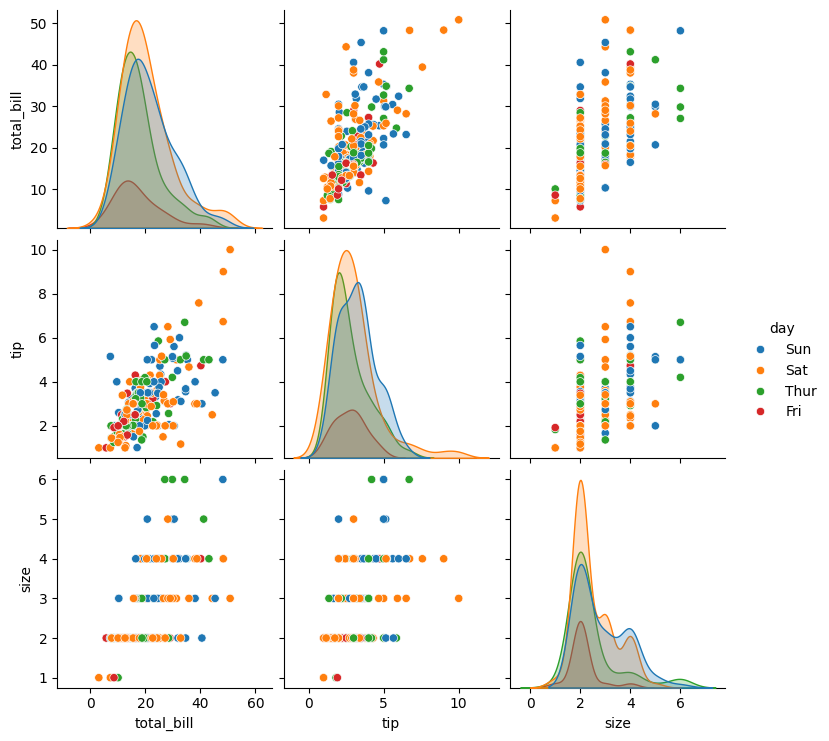

In [16]:
sns.pairplot(tips,hue='day');

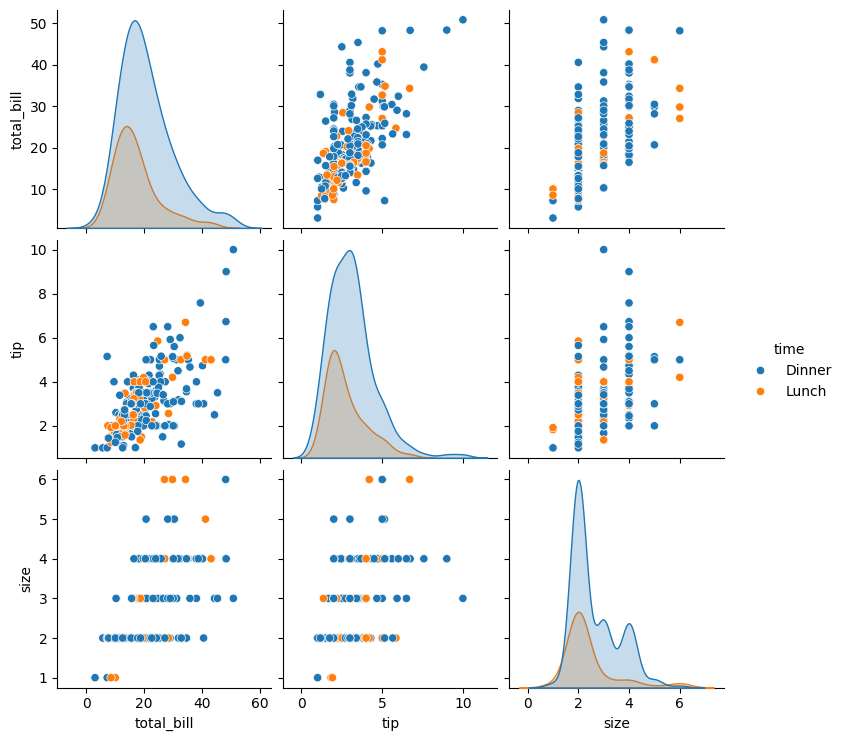

In [17]:
sns.pairplot(tips,hue='time');

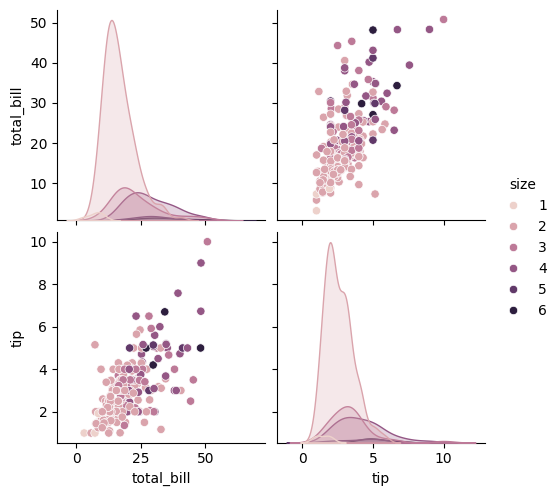

In [18]:
sns.pairplot(tips,hue='size');

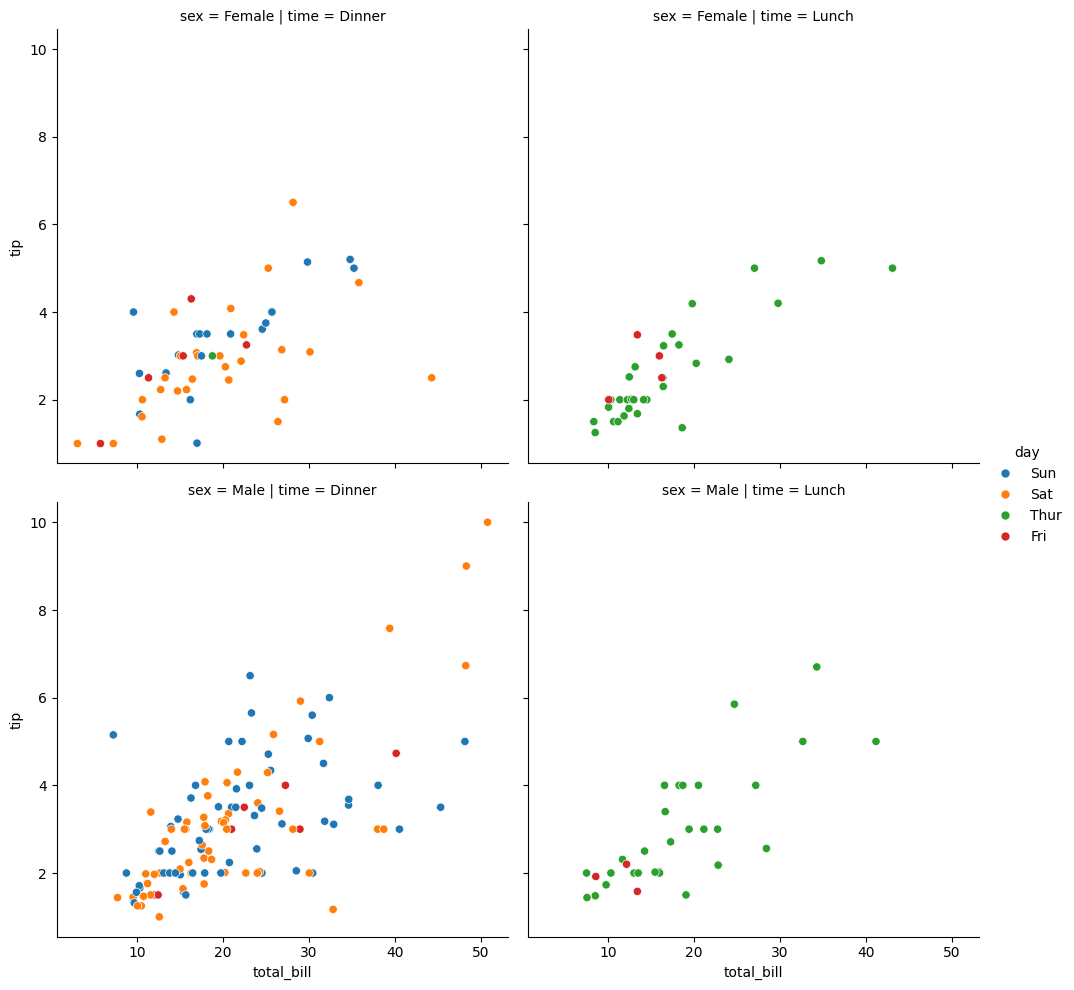

In [19]:
sns.relplot(x="total_bill", y="tip", hue="day",
                col="time", row="sex", data=tips);

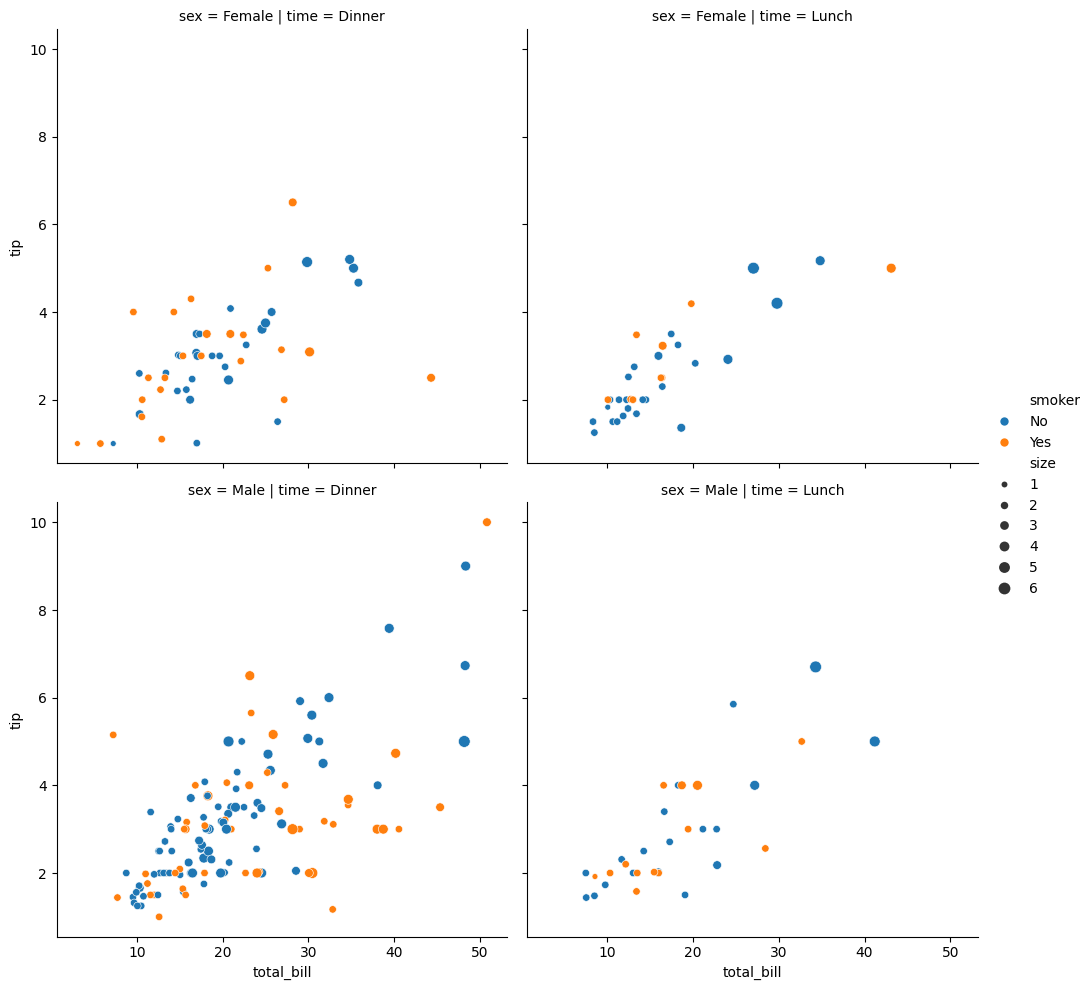

In [20]:
sns.relplot(x="total_bill", y="tip",row="sex", col="time",hue="smoker", size="size",data=tips);

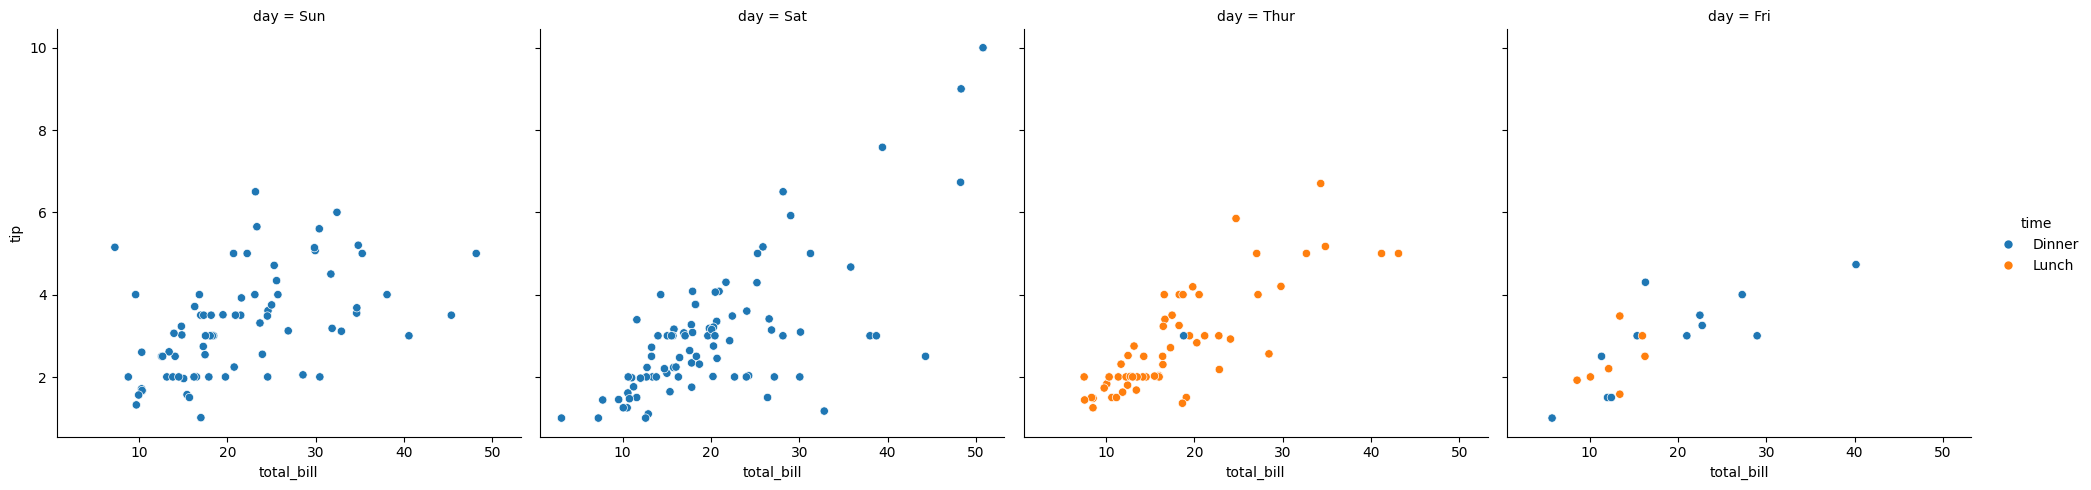

In [21]:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", data=tips)

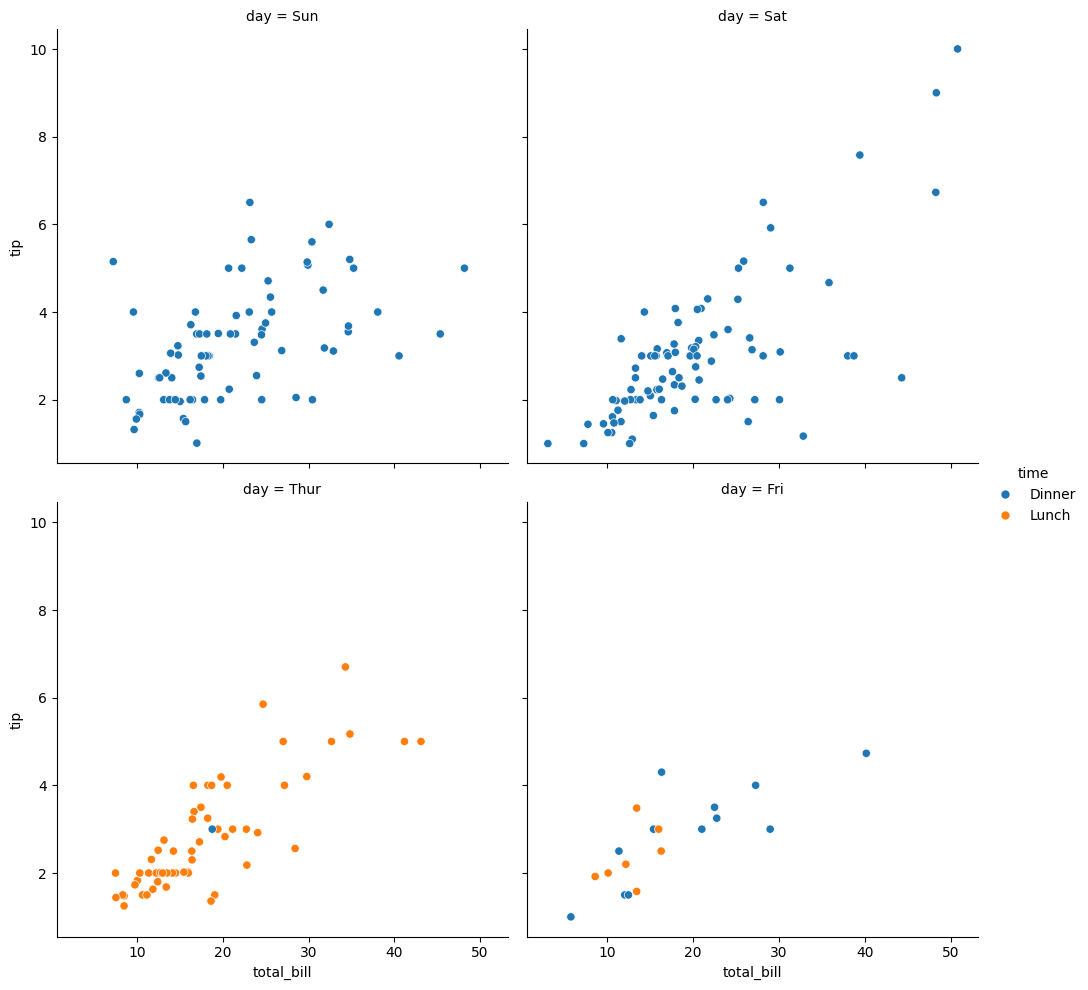

In [22]:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", col_wrap=2, data=tips)

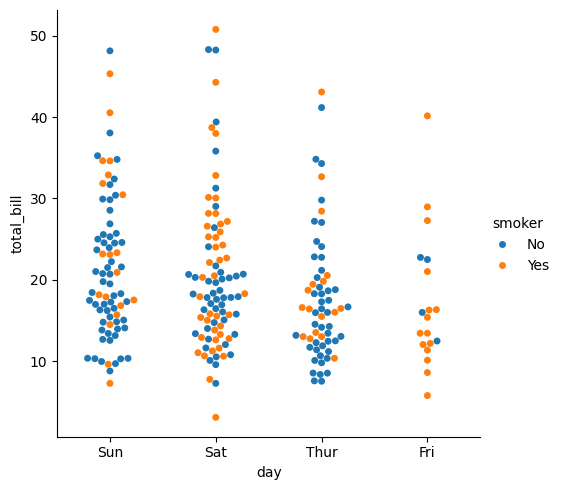

In [23]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips,aspect=1);

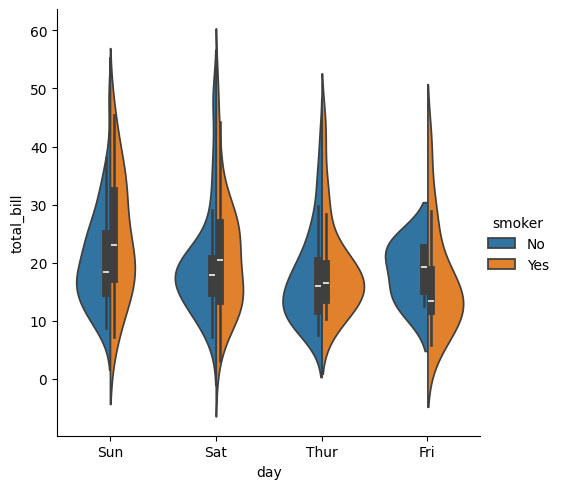

In [24]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips, aspect=1);

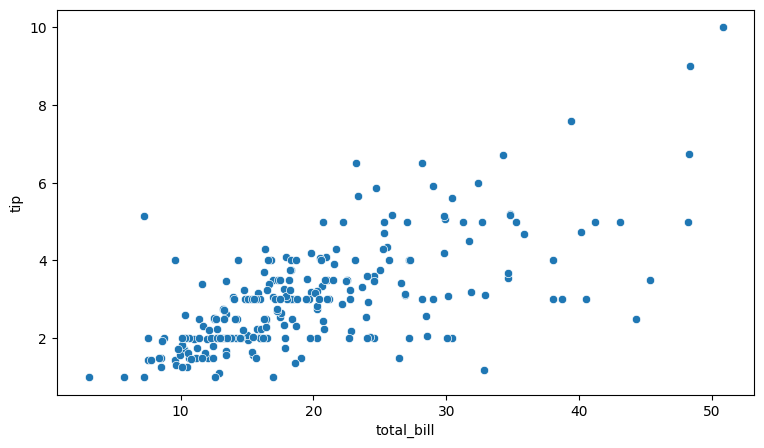

In [25]:
plt.figure(figsize=(9,5))
sns.scatterplot(x="total_bill", y="tip", data=tips);

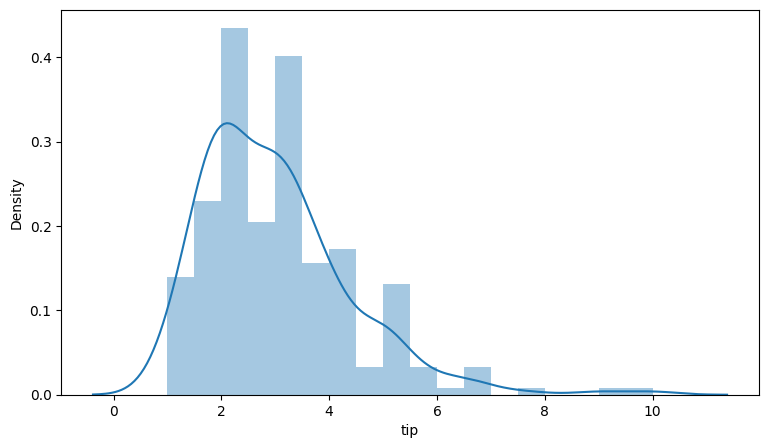

In [26]:
plt.figure(figsize=(9,5))
sns.distplot(tips['tip']);

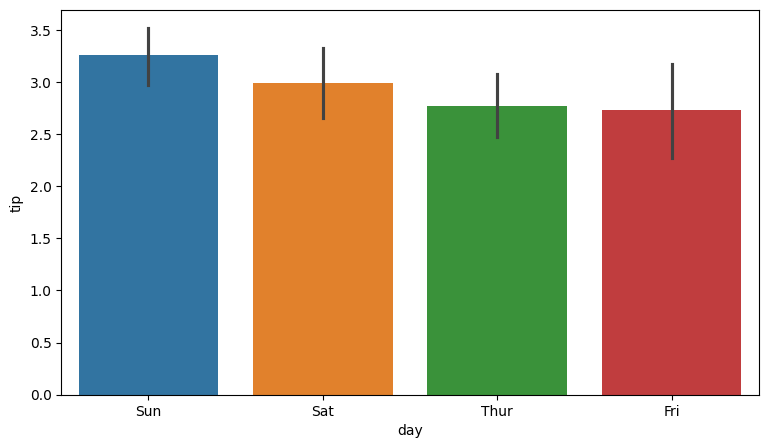

In [27]:
plt.figure(figsize=(9,5))
sns.barplot(x="day", y="tip", data = tips,hue='day');

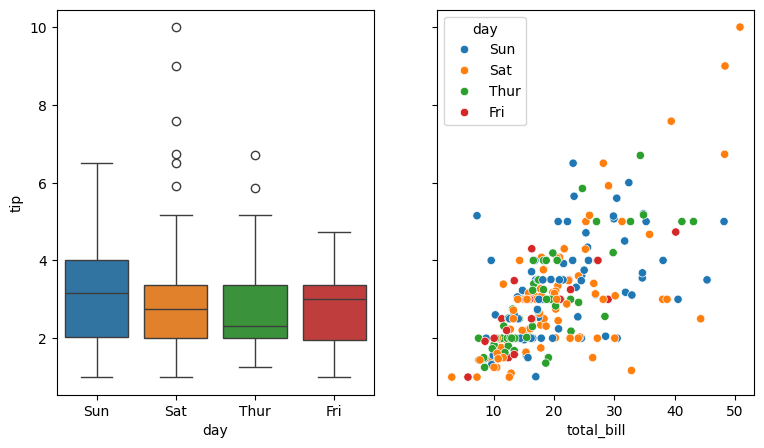

In [28]:
fig,ax =plt.subplots(1, 2, sharey=True, figsize=(9, 5))

sns.boxplot(x="day", y="tip", data=tips, ax=ax[0],hue='day')
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=ax[1]);

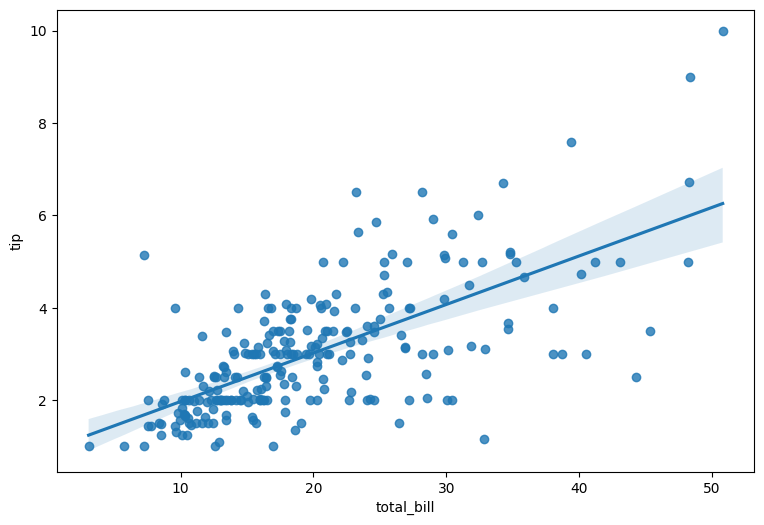

In [29]:
plt.figure(figsize=(9,6))
sns.regplot(x="total_bill", y="tip", data=tips);

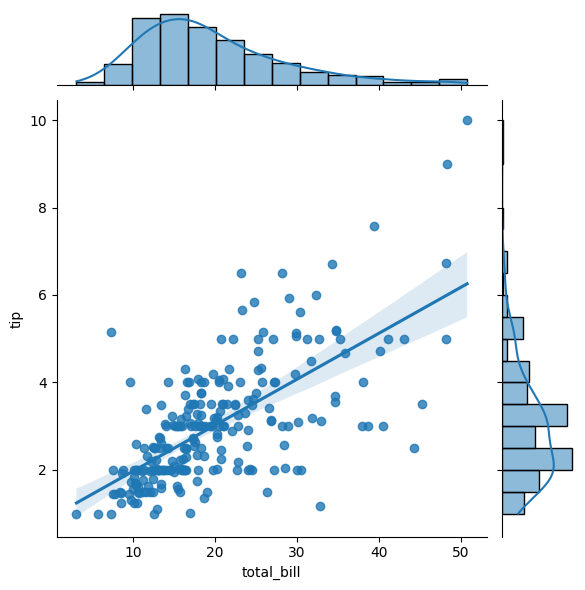

In [30]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')


In [31]:
corr = tips.corr(numeric_only=True)
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


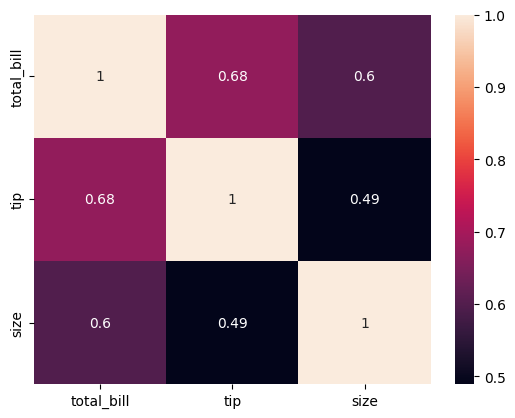

In [32]:
sns.heatmap(corr,annot=True);

In [33]:
df = tips.copy()

In [34]:
X = df[['total_bill','size']]
y = df['tip']

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=667,
                                                 test_size=0.3)

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [37]:
X.ndim

2

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
b0 = model.intercept_ #intercept

In [41]:
b1 = model.coef_[0]  #total_bill

In [42]:
b2 = model.coef_[1]  #size

In [43]:
b0+b1*30+b2*3

3.865813051567758

In [44]:
model.predict([[30,3]])[0]

3.865813051567758

## Save Model

In [45]:
import joblib

joblib.dump(model,'model_tips.pkl')

['model_tips.pkl']

In [46]:
input_data = [30,3]

## Load model

In [47]:
loaded_model = joblib.load('model_tips.pkl')
loaded_model

LinearRegression()

In [48]:
loaded_model.predict([input_data])[0]

3.865813051567758

In [49]:
## it works!